In [1]:
import sys
import os
sys.path.append(os.path.abspath('../scripts'))
from loader import load_news_data
import matplotlib.pyplot as plt
import seaborn as sns
import talib             
import pynance as py  
import quantstats as qs 
import numpy as np
import pandas as pd


df = load_news_data('../data/MSFT.csv')
print(df.head())
print(df.columns)

Loading data from ../data/MSFT.csv...
         Date      Close       High        Low       Open    Volume
0  2009-01-02  14.872976  14.924187  14.170662  14.287715  50084000
1  2009-01-05  15.011971  15.121707  14.675444  14.777866  61475200
2  2009-01-06  15.187551  15.363130  15.077815  15.180236  58083400
3  2009-01-07  14.273087  14.843718  14.251139  14.770560  72709900
4  2009-01-08  14.719351  14.770561  14.302350  14.360876  70255400
Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [2]:
# Clean stock data

# Remove rows with missing values
data = df.dropna()

# Ensure correct data types
for col in ['Open','High','Low','Close','Volume']:
    data[col] = data[col].astype(float)

         count          mean           std           min           25%  \
Close   3774.0  1.024587e+02  1.005300e+02  1.115939e+01  2.372356e+01   
High    3774.0  1.034408e+02  1.015274e+02  1.150559e+01  2.391467e+01   
Low     3774.0  1.013744e+02  9.943128e+01  1.095315e+01  2.349813e+01   
Open    3774.0  1.024208e+02  1.004968e+02  1.119622e+01  2.372139e+01   
Volume  3774.0  3.895754e+07  2.245626e+07  7.425600e+06  2.398462e+07   

                 50%           75%           max  
Close   4.897156e+01  1.658316e+02  3.777836e+02  
High    4.919598e+01  1.669679e+02  3.793630e+02  
Low     4.860615e+01  1.629116e+02  3.733019e+02  
Open    4.889349e+01  1.660021e+02  3.788300e+02  
Volume  3.279110e+07  4.865400e+07  3.193179e+08  


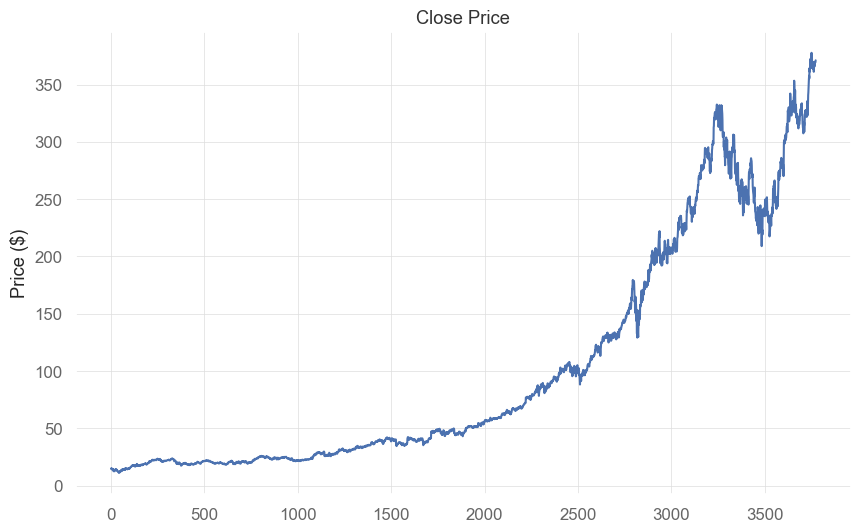

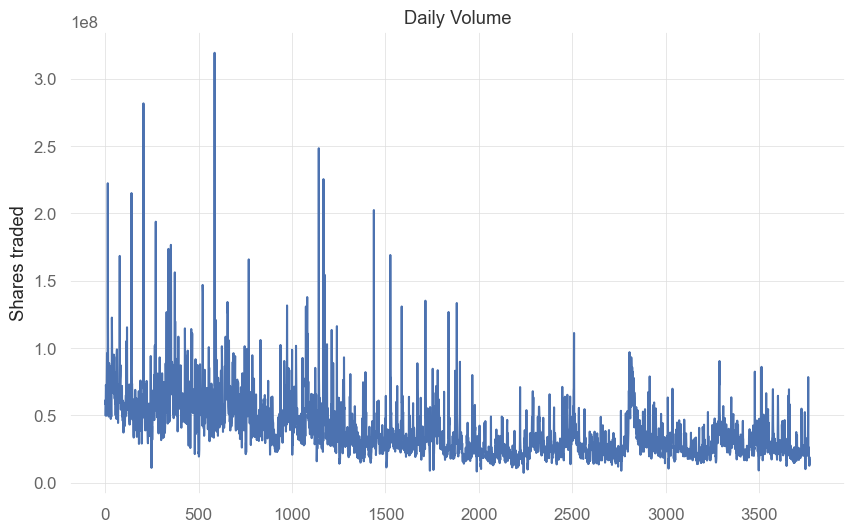

In [3]:
print(data.describe().T)

# Close price chart
data["Close"].plot(title="Close Price")
plt.ylabel("Price ($)")
plt.show()

# Volume chart
data["Volume"].plot(title="Daily Volume")
plt.ylabel("Shares traded")
plt.show()


In [4]:

if "Adj Close" in data.columns:
    price = data["Adj Close"]
else:
    price = data["Close"]

# --- Moving Averages ---
data["SMA_20"] = talib.SMA(price, timeperiod=20)
data["SMA_50"] = talib.SMA(price, timeperiod=50)
data["EMA_20"] = talib.EMA(price, timeperiod=20)

# --- RSI ---
data["RSI_14"] = talib.RSI(price, timeperiod=14)

# --- MACD ---
data["MACD"], data["MACD_signal"], data["MACD_hist"] = talib.MACD(
    price, fastperiod=12, slowperiod=26, signalperiod=9
)



data.tail()

,Date,Close,High,Low,Open,Volume,SMA_20,SMA_50,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist
3769,2023-12-22,369.767883,370.360181,367.921911,368.879451,17107500.0,368.730389,355.078464,366.580145,56.363342,2.805416,3.840081,-1.034664
3770,2023-12-26,369.846832,372.097540,368.701731,370.182461,12673100.0,368.535426,356.018111,366.891259,56.447998,2.767033,3.625471,-0.858438
3771,2023-12-27,369.264465,370.241738,368.020642,368.889342,14905400.0,368.109468,356.849368,367.117278,55.591261,2.658971,3.432171,-0.773200
3772,2023-12-28,370.458862,371.623696,369.353256,370.547702,14327000.0,367.933260,357.715942,367.435524,57.031664,2.639285,3.273594,-0.634309
3773,2023-12-29,371.209198,372.314805,368.682088,371.169703,18730800.0,367.791606,358.635943,367.794922,57.954296,2.653640,3.149603,-0.495963


In [5]:
from pynance import portfolio_optimizer as po

TICKERS = ["MSFT", "AMZN","GOOG","AAPL", "META", "NVDA"]

# Create the portfolio calculations object
portfolio = po.PortfolioCalculations(TICKERS)

print("=== Max Sharpe Portfolio (risk/return) ===")
print(portfolio.max_sharpe_portfolio("rr"))

print("\n=== Max Sharpe Portfolio weights ===")
print(portfolio.max_sharpe_portfolio("df").head())

print("\n=== Min Variance Portfolio (risk/return) ===")
print(portfolio.min_var_portfolio("rr"))

print("\n=== Min Variance Portfolio weights ===")
print(portfolio.min_var_portfolio("df").head())

c:\Users\Abenezer\Desktop\KAIM Project\nova-financial-analytics-week1\venv2\Lib\site-packages\pynance\datasources\data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adj_close_data[-1] == 0:
c:\Users\Abenezer\Desktop\KAIM Project\nova-financial-analytics-week1\venv2\Lib\site-packages\pynance\datasources\data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adj_close_data[-1] == 0:
c:\Users\Abenezer\Desktop\KAIM Project\nova-financial-analytics-week1\venv2\Lib\site-packages\pynance\datasources\data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is depr

=== Max Sharpe Portfolio (risk/return) ===
                   Max Sharpe Portfolio
Expected Return                  61.96%
Standard Deviation               35.59%

=== Max Sharpe Portfolio weights ===
     Portfolio Weight
MSFT            0.00%
AMZN            0.00%
GOOG           47.22%
AAPL            0.00%
META            0.00%

=== Min Variance Portfolio (risk/return) ===
                   Min Var Portfolio
Expected Return               22.17%
Standard Deviation            20.03%

=== Min Variance Portfolio weights ===
     Portfolio Weight
MSFT           47.22%
AMZN            0.00%
GOOG           15.39%
AAPL           36.41%
META            0.98%


Price & Moving Averages


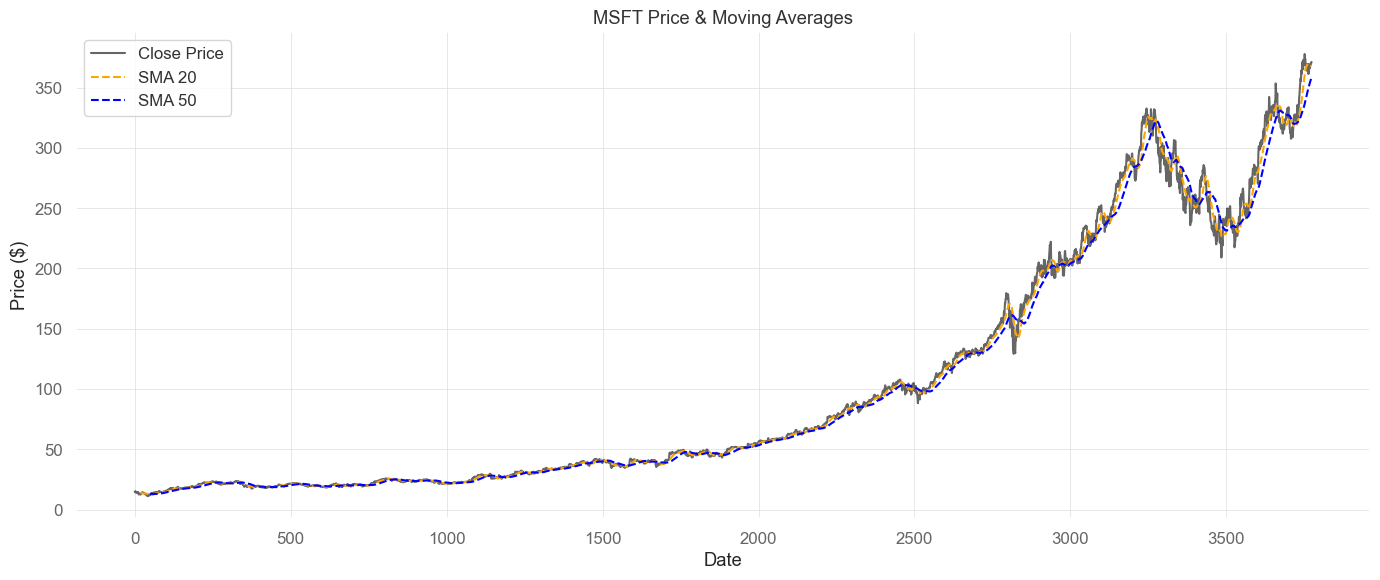

In [6]:

print("Price & Moving Averages")
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['Close'], label='Close Price', color='black', alpha=0.6)
plt.plot(data.index, data['SMA_20'], label='SMA 20', color='orange', linestyle='--')
plt.plot(data.index, data['SMA_50'], label='SMA 50', color='blue', linestyle='--')

plt.title('MSFT Price & Moving Averages')
plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

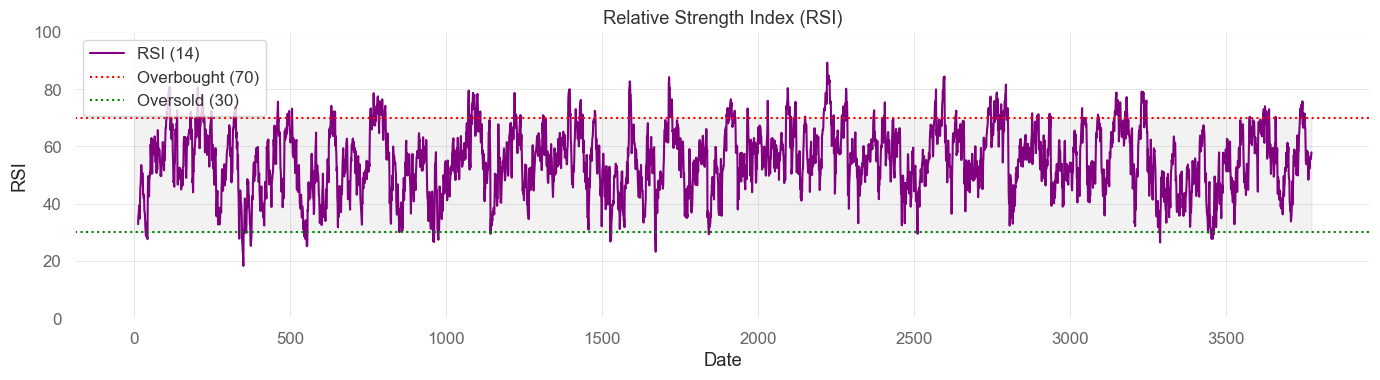

In [7]:
plt.figure(figsize=(14, 4))
plt.plot(data.index, data['RSI_14'], label='RSI (14)', color='purple')

# Add thresholds
plt.axhline(70, color='red', linestyle=':', label='Overbought (70)')
plt.axhline(30, color='green', linestyle=':', label='Oversold (30)')
plt.fill_between(data.index, 70, 30, color='gray', alpha=0.1)

plt.title('Relative Strength Index (RSI)')
plt.ylabel('RSI')
plt.xlabel('Date')
plt.ylim(0, 100)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



Subplot 3: MACD


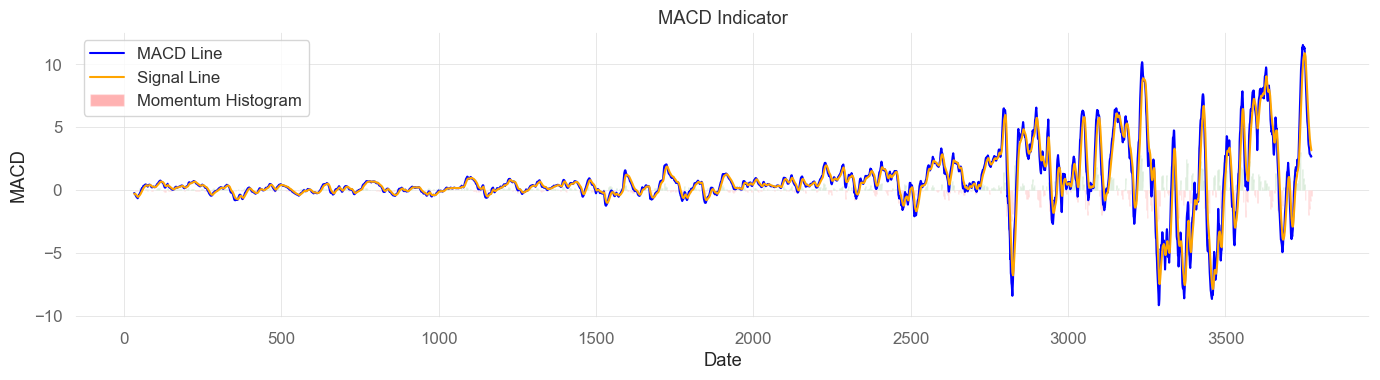

In [8]:
print("Subplot 3: MACD")

plt.figure(figsize=(14, 4))
plt.plot(data.index, data['MACD'], label='MACD Line', color='blue')
plt.plot(data.index, data['MACD_signal'], label='Signal Line', color='orange')

# Color histogram bars based on value
colors = ['green' if v >= 0 else 'red' for v in data['MACD_hist']]
plt.bar(data.index, data['MACD_hist'], color=colors, alpha=0.3, label='Momentum Histogram')

plt.title('MACD Indicator')
plt.ylabel('MACD')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()